In [1]:
# Scikit-learn version 0.24.2
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_tr, x_ts, y_tr, y_ts = train_test_split(X, y, test_size=10000, random_state=42)

In [3]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_tr, y_tr)

SGDClassifier()

In [4]:
y_tr_k, y_ts_k = y_tr == 7, y_ts == 7
y_tr_pred = cross_val_predict(sgd_clf, X_tr, y_tr_k, cv=3)

In [5]:
cross_val_score(sgd_clf, X_tr, y_tr_k, cv=3, scoring ="accuracy")

array([0.97375, 0.97795, 0.97825])

In [6]:
accuracy_score(y_tr_k, y_tr_pred)

0.9644666666666667

In [7]:
confusion_matrix(y_tr_k, y_tr_pred)

array([[52204,  1558],
       [  574,  5664]], dtype=int64)

In [8]:
f1_score(y_tr_k, y_tr_pred)

0.8416047548291234

In [9]:
y_scores = cross_val_predict(sgd_clf, X_tr, y_tr_k, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_tr_k, y_scores)
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

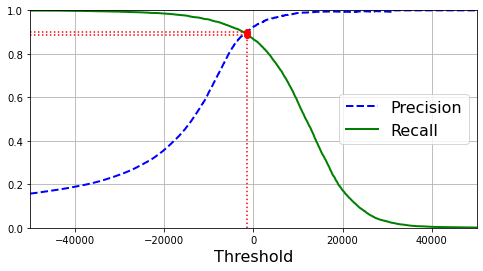

In [10]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision",linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize = 16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9,0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()